In [41]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)

loaded = defaultdict(list)
squished = []
folder = "./glad-prop-sweep_defc_vs_coop/"
num_files = 20

file_base_labels = {
    #"glad-mixed-sweep": "mixed grid",
    "glad-standard-sweep": "standard grid"
}

file_labels = dict()

for key in file_base_labels:
    for i in range(1, 10):
        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"


for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)
    
super_squished_standard = pd.concat(squished)
#super_squished = pd.concat([squished_coop, squished_balanced])


file_base_labels = {
    "glad-mixed-sweep": "mixed grid",
}

file_labels = dict()
loaded = defaultdict(list)
squished = []

for key in file_base_labels:
    for i in range(1, 10):
        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"
        
num_files = 20
for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)

super_squished_mixed = pd.concat(squished)
super_squished_mixed.head()

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percent_defector,donator,grid_usage,replicant,config
0,0,0.0,0,0.91,0.0,0.09,0.91,0.166667,0,mixed grid 10 %
1,10,10.0,10,0.91,10.0,0.09,0.91,0.166667,0,mixed grid 10 %
2,20,20.0,20,0.91,20.0,0.09,0.91,0.166667,0,mixed grid 10 %
3,30,30.0,30,0.91,30.0,0.09,0.91,0.166667,0,mixed grid 10 %
4,40,40.0,40,0.91,40.0,0.09,0.91,0.166667,0,mixed grid 10 %


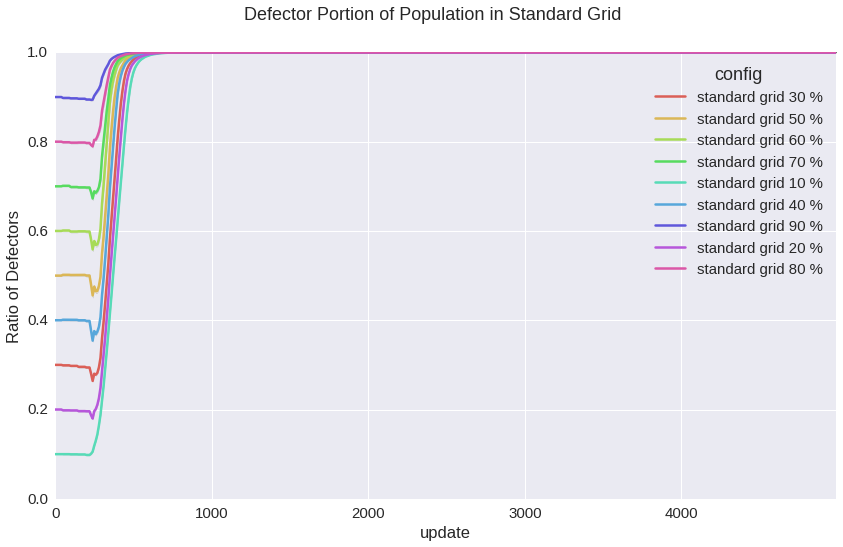

In [42]:

sns.plt.suptitle("Defector Portion of Population in Standard Grid")
ax = sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished_standard, color="hls")
ax.set(ylabel="Ratio of Defectors")

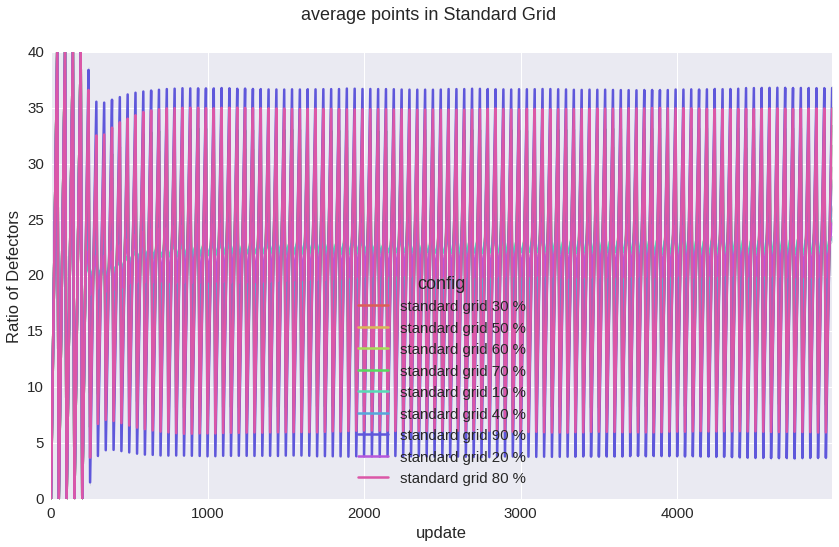

In [43]:
sns.plt.suptitle("average points in Standard Grid")
ax = sns.tsplot( time="update", value="avg_points", unit="replicant", 
           condition="config", data=super_squished_standard, color="hls")
ax.set(ylabel="Ratio of Defectors")

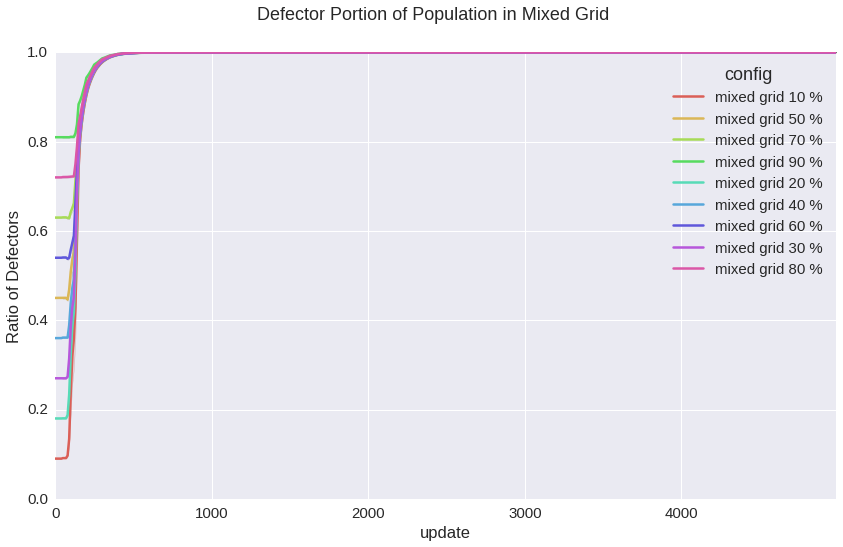

In [44]:
sns.plt.suptitle("Defector Portion of Population in Mixed Grid")
ax = sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished_mixed, color="hls")
ax.set(ylabel="Ratio of Defectors")